##Predict the percentage of an student based on the no. of study hours.
##Simple Linear Regression

####What will be predicted score if a student studies for 9.25 hrs/ day?

In [2]:
#importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#importing the dataset

df = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [4]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.shape

(25, 2)

In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


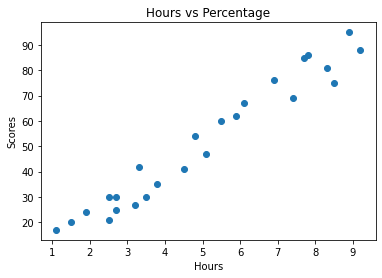

In [7]:
#visualizing the data

plt.scatter(df['Hours'], df['Scores'])
plt.title('Hours vs Percentage')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [8]:
#Train Test Split 

X = df.drop('Scores',axis=1)
y = df['Scores']

In [9]:
X.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [10]:
y.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

In [11]:
#splitting the data into training and testing sets. 80% percentage for train and 20% percentage for test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [12]:
#importing Linear Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [14]:
#predict the test values
y_pred = regressor.predict(X_test)
print(y_pred)

[83.18814104 27.03208774 27.03208774 69.63323162 59.95115347]


In [15]:
#compare the actual values with predicted one

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
8,81,83.188141
16,30,27.032088
0,21,27.032088
23,76,69.633232
11,62,59.951153


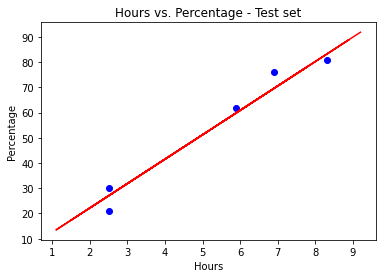

In [16]:
#Visualising the Test set results
plt.scatter(X_test, y_test, color = 'blue')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.title('Hours vs. Percentage - Test set')
plt.xlabel('Hours')
plt.ylabel('Percentage')
plt.show()

In [17]:
#predict the score for 9.25 hours of study per day

dataset = np.array(9.25)
dataset = dataset.reshape(-1, 1)
pred = regressor.predict(dataset)
print("If the student studies for 9.25 hours/day, the score is {}.".format(pred))

If the student studies for 9.25 hours/day, the score is [92.38611528].


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [18]:
#Error calculations

from sklearn import metrics  
print('Mean Absolute Error of the model is:', metrics.mean_absolute_error(y_test, y_pred))

from sklearn.metrics import r2_score
print("The R-Square of the model is: ",r2_score(y_test,y_pred)) 

Mean Absolute Error of the model is: 3.9207511902099244
The R-Square of the model is:  0.9678055545167994


##Conclusions

###In order to forecast the percentage of students with respect to study hours, we utilized the Simple Linear Regression, which showed that for 9.25 hours of study each day, the student will receive 92.38% marks.